In [1]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import myutils 
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyDummyClassifier, MyNaiveBayesClassifier
from myclassifiers import MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import matplotlib.pyplot as plt

# Car Sales Classifier 

 We are going to perform some eda and use multiple classifiers to detemermine the most likely sale price of a car based on a number of classifiers. Our train set has the following attributes:  

| Attribute     | Type      | Notes                                         |
| :---          |    :----: |:---                                           |
| pricesold     | int       |Our Class label; will require discretization   |
| make          | string    |                                               |
| year          | int       |                                               |
| title status  | string    |                                               |
| mileage       | int       |                                               |
| color         | string    |                                               |
| VIN           | int       |                                               |
| Lot           | int       |                                               |



First we will import out dataset into a table 

In [2]:
auto_dataset = MyPyTable().load_from_file("used_car_sales.csv")

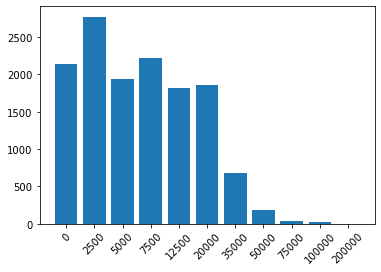

In [3]:
auto_dataset = myutils.clean_data(auto_dataset)
auto_dataset_explored = MyPyTable(column_names=["pricesold","yearsold","Make","Model","Year","BodyType","NumCylinders","DriveType"])
auto_dataset_explored = mysklearn.myutils.create_MyPyTable_for_auto_set(auto_dataset)
auto_dataset_explored.remove_rows_with_missing_values()
prices = auto_dataset_explored.get_column("pricesold")
discritized_prices, ranges = myutils.discretize_sales_price(prices)
myutils.plot_prices(discritized_prices, ranges)
price_sold = auto_dataset.get_column("pricesold")
year_sold = auto_dataset.get_column("yearsold")
make = auto_dataset.get_column("Make")
year = auto_dataset.get_column("Year")
body_type = auto_dataset.get_column("BodyType")
num_cylinders = auto_dataset.get_column("NumCylinders")
drive_type = auto_dataset.get_column("DriveType")

In [4]:
X_train = mysklearn.myutils.create_X_train_for_auto_set_without_prices(auto_dataset_explored)
folds = myevaluation.stratified_kfold_split(X_train, discritized_prices, random_state=0)
actual_train_folds = []
actual_test_folds = []
for fold in folds:
    temp_x_train = []
    temp_x_test = []
    temp_y_train = []
    temp_y_test = []
    place = 0
    for item in fold:   
        for i in item:
            if place == 0:
                temp_x_train.append([year_sold[i], make[i], year[i], body_type[i], num_cylinders[i], drive_type[i]])
                temp_y_train.append(discritized_prices[i])
                
            else:
                temp_x_test.append([year_sold[i], make[i], year[i], body_type[i], num_cylinders[i], drive_type[i]])
                temp_y_test.append(discritized_prices[i])
        place += 1
    actual_train_folds.append((temp_x_train, temp_y_train))
    actual_test_folds.append((temp_x_test, temp_y_test))
count = 1

header = ["year_sold", "make", "year", "body_type", "cylinders", "drive_type"]

### Fixing Noise

In [5]:

X_train = actual_test_folds[0][0]
y_train = actual_train_folds[0][1]
X_test = actual_test_folds[0][0]
y_test = actual_test_folds[0][1]

myutils.X_train_bodystyle_noise_reduction(X_train)
myutils.X_train_bodystyle_noise_reduction(X_test)
myutils.discretize_year(X_train)
myutils.clean_cylinder_count(X_train)
myutils.clean_cylinder_count(X_test)
myutils.clean_drive_type(X_train)
myutils.clean_drive_type(X_test)

all_values = []
for val in X_train:
    if val[2] not in all_values:
        all_values.append(val[2])
print(all_values)



['2000s', '2010s', '1980s', '1960s', '1970s', '1990s', '1940s', '1920s', '1950s', '1930s', '2020s', '1910s', '1900s']


### Dummy Classifier

In [6]:
dummy = MyDummyClassifier()
dummy.fit(X_train, y_train)
y_predicted = dummy.predict(actual_test_folds[0][0])
print("Accuracy: ", myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
print("Error Rate: ", 1.0 - myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
   

Accuracy:  0.20285609666788723
Error Rate:  0.7971439033321128


### Bayes Classifier

In [7]:
bayes = MyNaiveBayesClassifier()
bayes.fit(X_train, y_train)
y_predicted = bayes.predict(actual_test_folds[0][0])
print("Accuracy: ", myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
print("Error Rate: ", 1.0 - myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))

Accuracy:  0.16257781032588794
Error Rate:  0.8374221896741121


### Random Forrest Classifier

In [8]:
rf_clf = MyRandomForestClassifier()
rf_clf.fit(actual_train_folds[0][0], 100, 20, 4)
print("")

y_predicted = rf_clf.predict(actual_test_folds[0][1], actual_test_folds[0][1])
print("Accuracy: ", myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))
print("Error Rate: ", 1.0 - myevaluation.accuracy_score(actual_test_folds[0][1], y_predicted))

['Audi', 'Hummer', 'Jeep', 'Chevrolet']
[1971.0, 2014.0, 1982.0, 2002.0]
[2018.0, 2019.0, 2020.0]
['Ford', 'Fiat', 'Saab', 'Toyota']
['Sedan', 'Wagon', 'Convertible', 'SUV']
[2002.0, 2004.0, 1959.0, 1984.0]
[2004.0, 1991.0, 2013.0, 2010.0]
[8.0, 6.0, 10.0]
['SUV', 'Standard Cab Pickup', 'Convertible']
['Ram', 'Chevrolet', 'Mercedes-Benz', 'Ford']
['Mercedes-Benz', 'Ford', 'Chevrolet', 'Nissan']
['', 'Coupe', 'Standard Cab Pickup', 'Sedan']
['Jeep', 'Chevrolet', 'Mercedes-Benz', 'Subaru']
['Mercedes-Benz', 'Ford', 'Jeep', 'Cadillac']
['Crew Cab Pickup', '', 'Hard Top', 'Hatchback']
['Convertible', 'Crew Cab Pickup', 'Coupe', '']
[1970.0, 1978.0, 2014.0, 2008.0]
['Chevrolet', 'Ford', 'Toyota', 'Mazda']
['', 'Hatchback', 'SUV', 'Convertible']
[1991.0, 2016.0, 2003.0, 1985.0]
['Extended Cab Pickup', 'Convertible', 'Standard Cab Pickup', 'Sedan']
['Cab & Chassis', 'Roadster 2 door convertible/hardtop', 'Minivan', 'Pickup Truck']
[2013.0, 2008.0, 2012.0, 1987.0]
['Subaru', 'Pontiac', 'Merced

TypeError: 'int' object is not subscriptable